**TALLER 1. PODER DE MERCADO**

Liliana Paola Villanueva Caicedo

Importar la libreria y llamar la base de datos, la cual contiene la información de θ, β, Costos Marginales y el sector, para cada empresa registrada.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [ ]:
url = 'https://raw.githubusercontent.com/it-ces/Datasets/main/MarketPower.csv'

In [ ]:
df = pd.read_csv(url)
df

Unnamed: 0        theta  beta         cm     sector
0             0   125.121419  31.5   9.799712   Software
1             1   125.645324  30.5  10.616998   Software
2             2   126.766324  17.5   9.426922   Software
3             3   127.141536  22.5   9.698818   Software
4             4   127.472341  28.5   9.042124   Software
..          ...          ...   ...        ...        ...
122           0  1237.516764  24.4   4.306088  Financial
123           1  1236.938396  11.4   5.101223  Financial
124           2  1235.802773  12.4   4.073056  Financial
125           3  1237.271186  23.4   3.709515  Financial
126           4  1238.975302  30.4   6.014435  Financial

[127 rows x 5 columns]

**EJERCICIO 1:**

Para calcular los niveles optimos de producción (q), para cada empresa, se tiene que:

$$ q = [\dfrac{θ - CM}{2β}]$$

Así, en la siguiente tabla se incluyen los niveles optimos de producción por empresa.


In [ ]:
df['q']= (df['theta'] - df['cm'])/(2*df['beta'])
df

Unnamed: 0        theta  beta         cm     sector          q
0             0   125.121419  31.5   9.799712   Software   1.830503
1             1   125.645324  30.5  10.616998   Software   1.885710
2             2   126.766324  17.5   9.426922   Software   3.352554
3             3   127.141536  22.5   9.698818   Software   2.609838
4             4   127.472341  28.5   9.042124   Software   2.077723
..          ...          ...   ...        ...        ...        ...
122           0  1237.516764  24.4   4.306088  Financial  25.270711
123           1  1236.938396  11.4   5.101223  Financial  54.027946
124           2  1235.802773  12.4   4.073056  Financial  49.666521
125           3  1237.271186  23.4   3.709515  Financial  26.358155
126           4  1238.975302  30.4   6.014435  Financial  20.278962

[127 rows x 6 columns]

**EJERCICIO 2:**

**2.1.** Para determinar la participación de la producción de cada empresa, en el total de la producción de cada sector, primero y de manera informativa, se contaran por sector, la cantidad de empresas registradas en la base de datos.

In [ ]:
df['sector'].value_counts()

Agriculture    100
Software        20
Financial        5
Diapers          2
Name: sector, dtype: int64

A continuación, se calcularon, por sector, el total de la producción, obteniendo los siguientes resultados:

In [ ]:
sectores  = df['sector'].unique()
for sector in sectores:
  print("Para el sector", sector, "la producción total es:", df[df['sector']==sector]['q'].sum())

Para el sector Software la producción total es: 113.3359003633779
Para el sector Diapers la producción total es: 605.145944423977
Para el sector Agriculture la producción total es: 2845.0230850645457
Para el sector Financial la producción total es: 175.60229457919306


Una vez calculada la producción total por sector, se calculó el porcentaje de participación de cada empresa, obteniendo la información contenida en la siguiente tabla:

In [ ]:
df['QTotalSector'] = df.groupby(by=['sector'])['q'].transform('sum')

df['Participación (%)'] = (np.around((df['q']/df['QTotalSector']),decimals=4))*100
df

Unnamed: 0        theta  beta         cm     sector          q  \
0             0   125.121419  31.5   9.799712   Software   1.830503   
1             1   125.645324  30.5  10.616998   Software   1.885710   
2             2   126.766324  17.5   9.426922   Software   3.352554   
3             3   127.141536  22.5   9.698818   Software   2.609838   
4             4   127.472341  28.5   9.042124   Software   2.077723   
..          ...          ...   ...        ...        ...        ...   
122           0  1237.516764  24.4   4.306088  Financial  25.270711   
123           1  1236.938396  11.4   5.101223  Financial  54.027946   
124           2  1235.802773  12.4   4.073056  Financial  49.666521   
125           3  1237.271186  23.4   3.709515  Financial  26.358155   
126           4  1238.975302  30.4   6.014435  Financial  20.278962   

     QTotalSector  Participación (%)  
0      113.335900               1.62  
1      113.335900               1.66  
2      113.335900               2.96  
3      113.335900               2.30  
4      113.335900               1.83  
..            ...                ...  
122    175.602295              14.39  
123    175.602295              30.77  
124    175.602295              28.28  
125    175.602295              15.01  
126    175.602295              11.55  

[127 rows x 8 columns]

**2.2** Para describir los datos, por medio de la estadistica, se calcularon la media, valor máximo, valor mínimo, desviación estandar y coeficiente de variación, tanto para la producción optima (q) y el costo marginal (cm). De esta manera, teniendo en cuenta que:



1.   Si ***CV < 0.3*** el conjunto de datos es homogéneo y;
2.   Si ***CV > 0.3*** el conjunto de datos es heterogéneo.

Se obtuvó:

**Para describir la producción óptima por sector**

In [ ]:
for sector in sectores:
  mean =  df[df['sector']==sector]['q'].mean()
  max = df[df['sector']==sector]['q'].max()
  min = df[df['sector']==sector]['q'].min()
  std =  df[df['sector']==sector]['q'].std()
  print(sector, 'mean:', round(mean,2),'max:', round(max,2), 'min:', round(min,2), 'std:',round(std,2) , 'CV:', round(std/mean,2))

Software mean: 5.67 max: 23.11 min: 1.83 std: 6.03 CV: 1.06
Diapers mean: 302.57 max: 450.01 min: 155.14 std: 208.5 CV: 0.69
Agriculture mean: 28.45 max: 73.93 min: 11.61 std: 16.97 CV: 0.6
Financial mean: 35.12 max: 54.03 min: 20.28 std: 15.52 CV: 0.44


De acuerdo con los resultados mostrados, dado que los coeficientes de variación para la producción en cada sector, es mayor a 0.3, se puede inferir que los conjuntos de datos son heterogéneo, presenta una alta variabilidad y por lo tanto, su media no es representativa. De igual manera, esto se aprecia en el margen tan amplio que existe entre los valores mínimos y máximos.

Al obtener que la media no es representativa, se tomara en cuenta el valor de la mediana para cada uno de los conjuntos de datos:


In [ ]:
for sector in sectores:
  median =  df[df['sector']==sector]['q'].median()
  print(sector, 'median:', round(median,2))

Software median: 2.7
Diapers median: 302.57
Agriculture median: 22.22
Financial median: 26.36


Para observar esto de una manera más visual, se crearon las siguientes gráficas:

Text(0, 0.5, 'Cantidad de producción óptima')

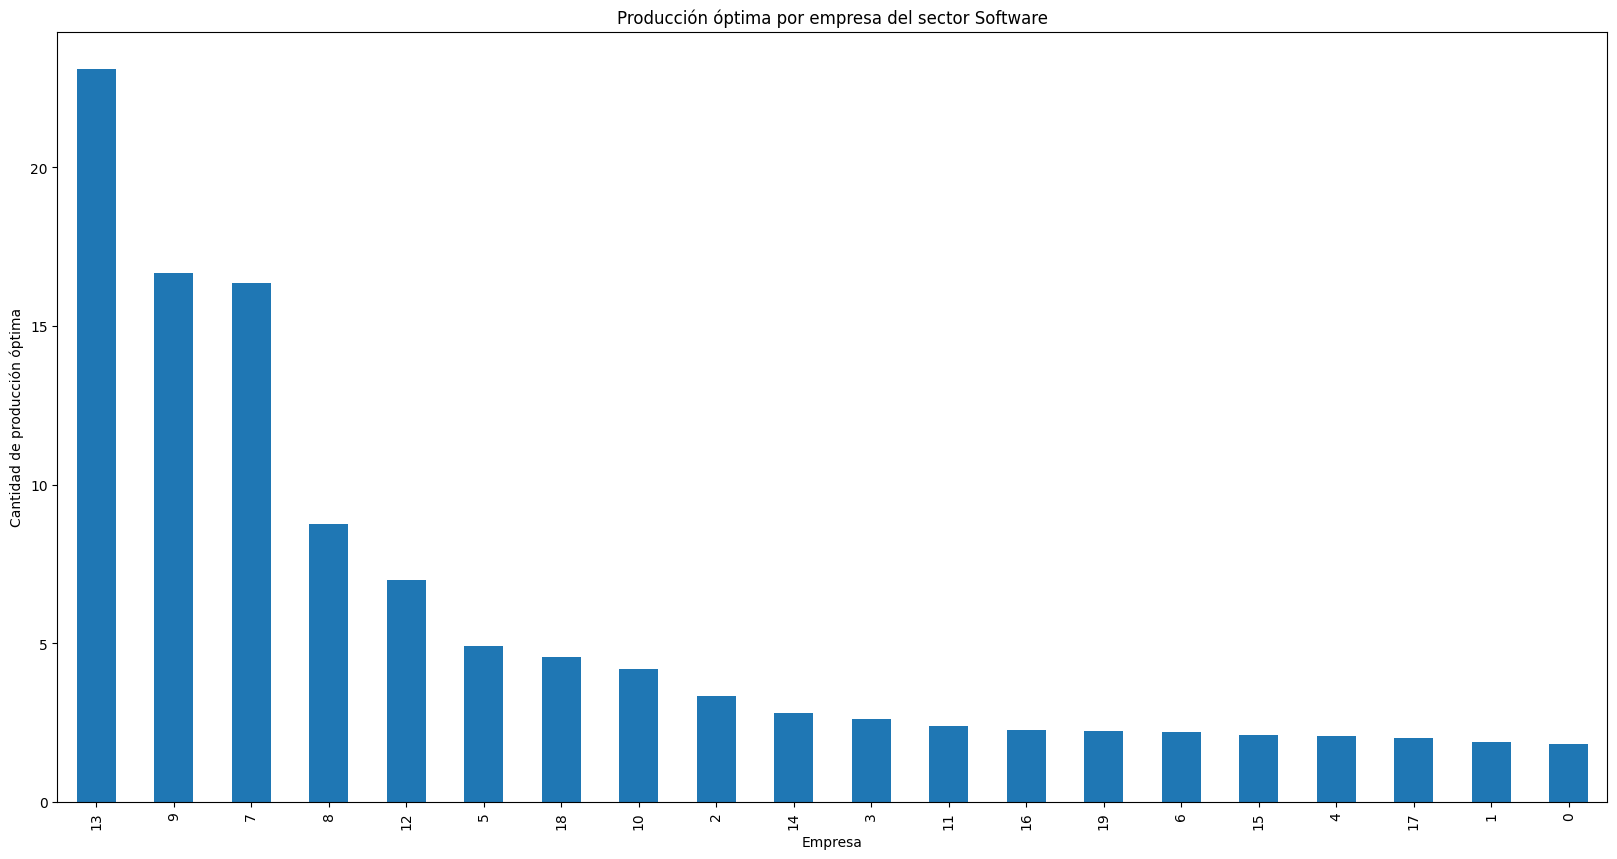

In [ ]:
plot.rcParams["figure.figsize"] = (20,10)
df[df['sector']=='Software']['q'].sort_values(ascending = False).plot.bar()
plot.title('Producción óptima por empresa del sector Software')
ax = plot.subplot()
ax.set_xlabel('Empresa')
ax.set_ylabel('Cantidad de producción óptima')

Text(0, 0.5, 'Cantidad de producción óptima')

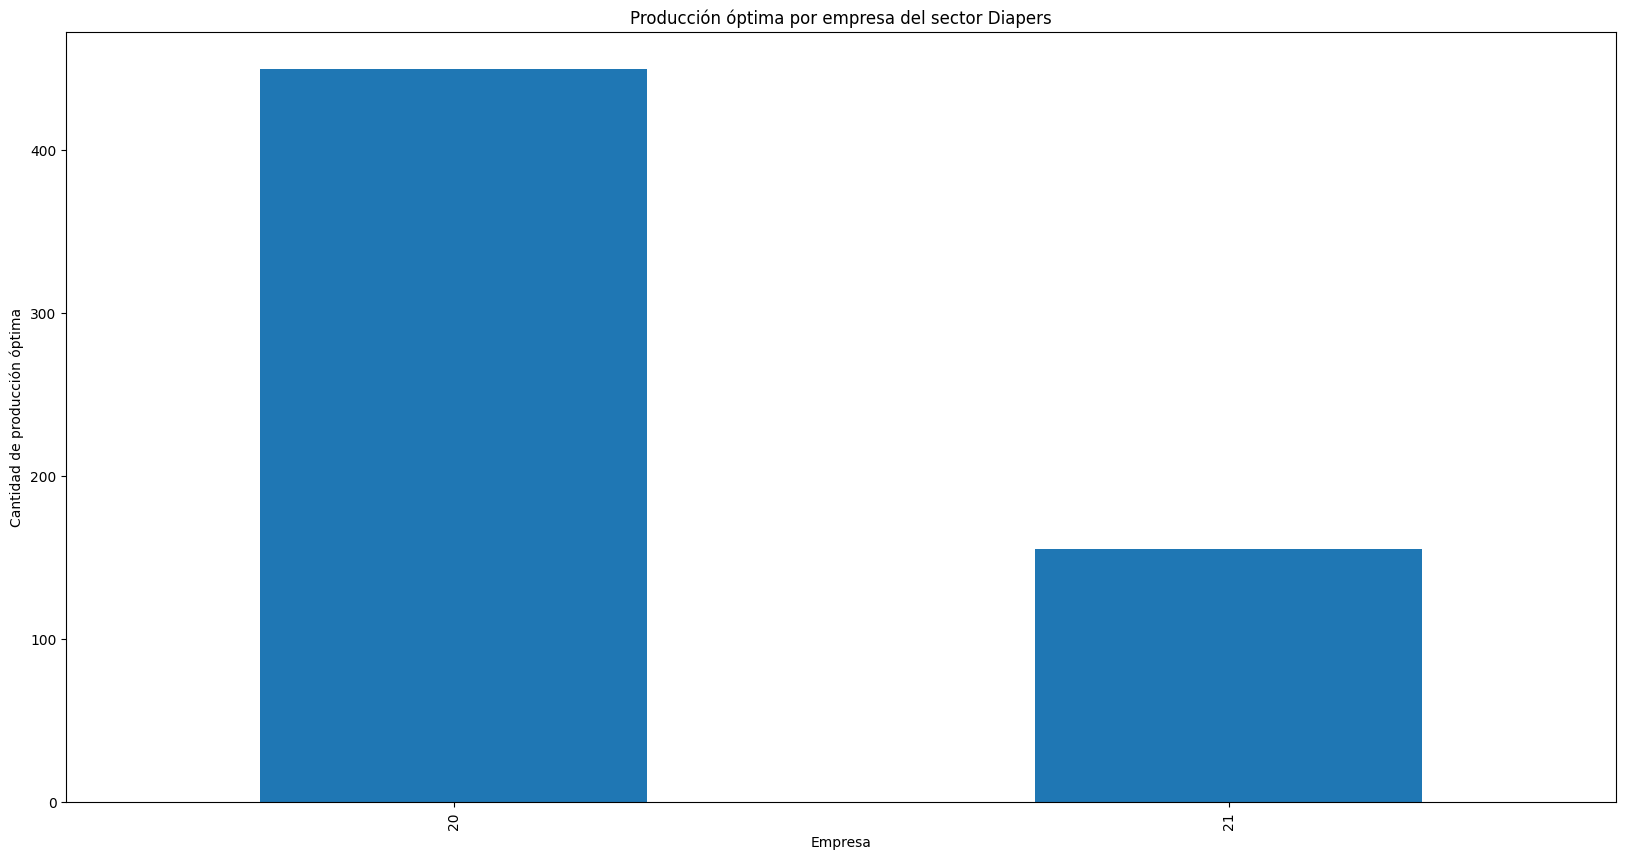

In [ ]:
from matplotlib.projections.polar import PolarTransform
df[df['sector']=='Diapers']['q'].sort_values(ascending = False).plot.bar()
plot.title('Producción óptima por empresa del sector Diapers')
ax = plot.subplot()
ax.set_xlabel('Empresa')
ax.set_ylabel('Cantidad de producción óptima')

Text(0, 0.5, 'Cantidad de producción óptima')

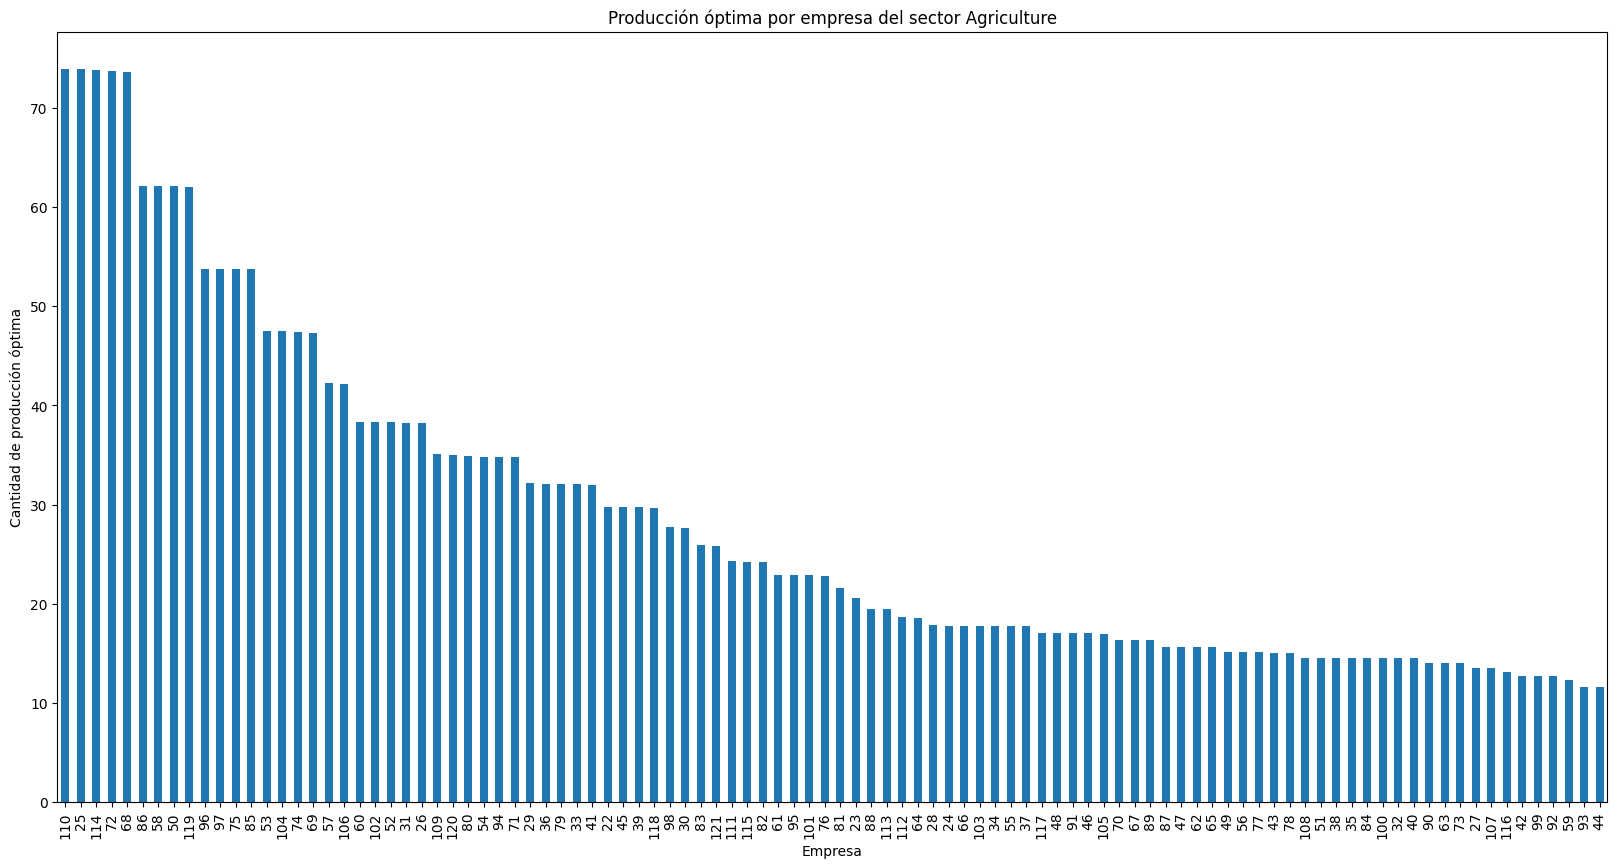

In [ ]:
from matplotlib.projections.polar import PolarTransform
df[df['sector']=='Agriculture']['q'].sort_values(ascending = False).plot.bar()
plot.title('Producción óptima por empresa del sector Agriculture')
ax = plot.subplot()
ax.set_xlabel('Empresa')
ax.set_ylabel('Cantidad de producción óptima')

Text(0, 0.5, 'Cantidad de producción óptima')

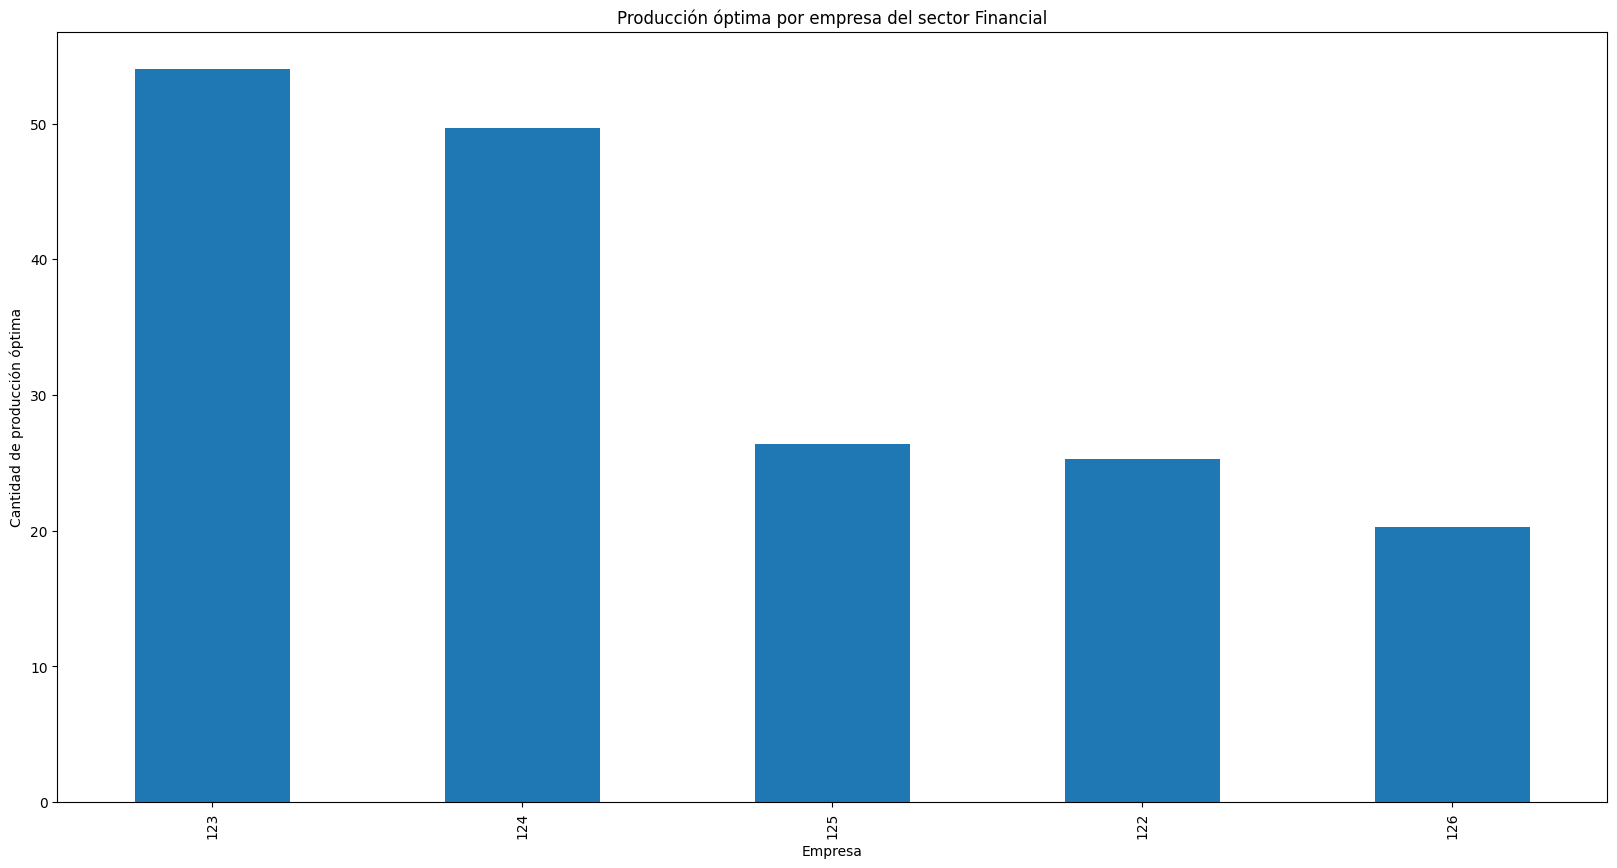

In [ ]:
from matplotlib.projections.polar import PolarTransform
df[df['sector']=='Financial']['q'].sort_values(ascending = False).plot.bar()
plot.title('Producción óptima por empresa del sector Financial')
ax = plot.subplot()
ax.set_xlabel('Empresa')
ax.set_ylabel('Cantidad de producción óptima')

**Para describir los costos marginales por sector**

In [ ]:
for sector in sectores:
  mean =  df[df['sector']==sector]['cm'].mean()
  max = df[df['sector']==sector]['cm'].max()
  min = df[df['sector']==sector]['cm'].min()
  std =  df[df['sector']==sector]['cm'].std()
  print(sector, 'mean:', round(mean,2),'max:', round(max,2), 'min:', round(min,2), 'std:',round(std,2) , 'CV:', round(std/mean,2))

Software mean: 10.03 max: 11.99 min: 8.22 std: 1.18 CV: 0.12
Diapers mean: 4.32 max: 4.44 min: 4.21 std: 0.16 CV: 0.04
Agriculture mean: 6.5 max: 8.48 min: 4.6 std: 1.23 CV: 0.19
Financial mean: 4.64 max: 6.01 min: 3.71 std: 0.92 CV: 0.2


Para los costos marginales, a diferencia de el análisis para la producción, se observa que en todos los coeficientes de variación, para cada sector, son menores a 0.3, por lo que los conjuntos de datos son homogéneos, no hay mucha variabilidad y la media es representativa.

Sin embargo, se calculó la mediana para comprobar la información anterior.

In [ ]:
for sector in sectores:
  median =  df[df['sector']==sector]['cm'].median()
  print(sector, 'median:', round(median,2))

Software median: 9.75
Diapers median: 4.32
Agriculture median: 6.56
Financial median: 4.31


Calculando la mediana, observamos que para cada sector, es muy similar o igual a la media. Por lo que se corrobora que existe poca variabilidad de los datos y que la media es representativa.

De igual manera, los valores mínimos y máximos no muestran una diferencia muy grande, lo cual también se ve en los siguientes gráficos.

Text(0, 0.5, 'Costo marginal')

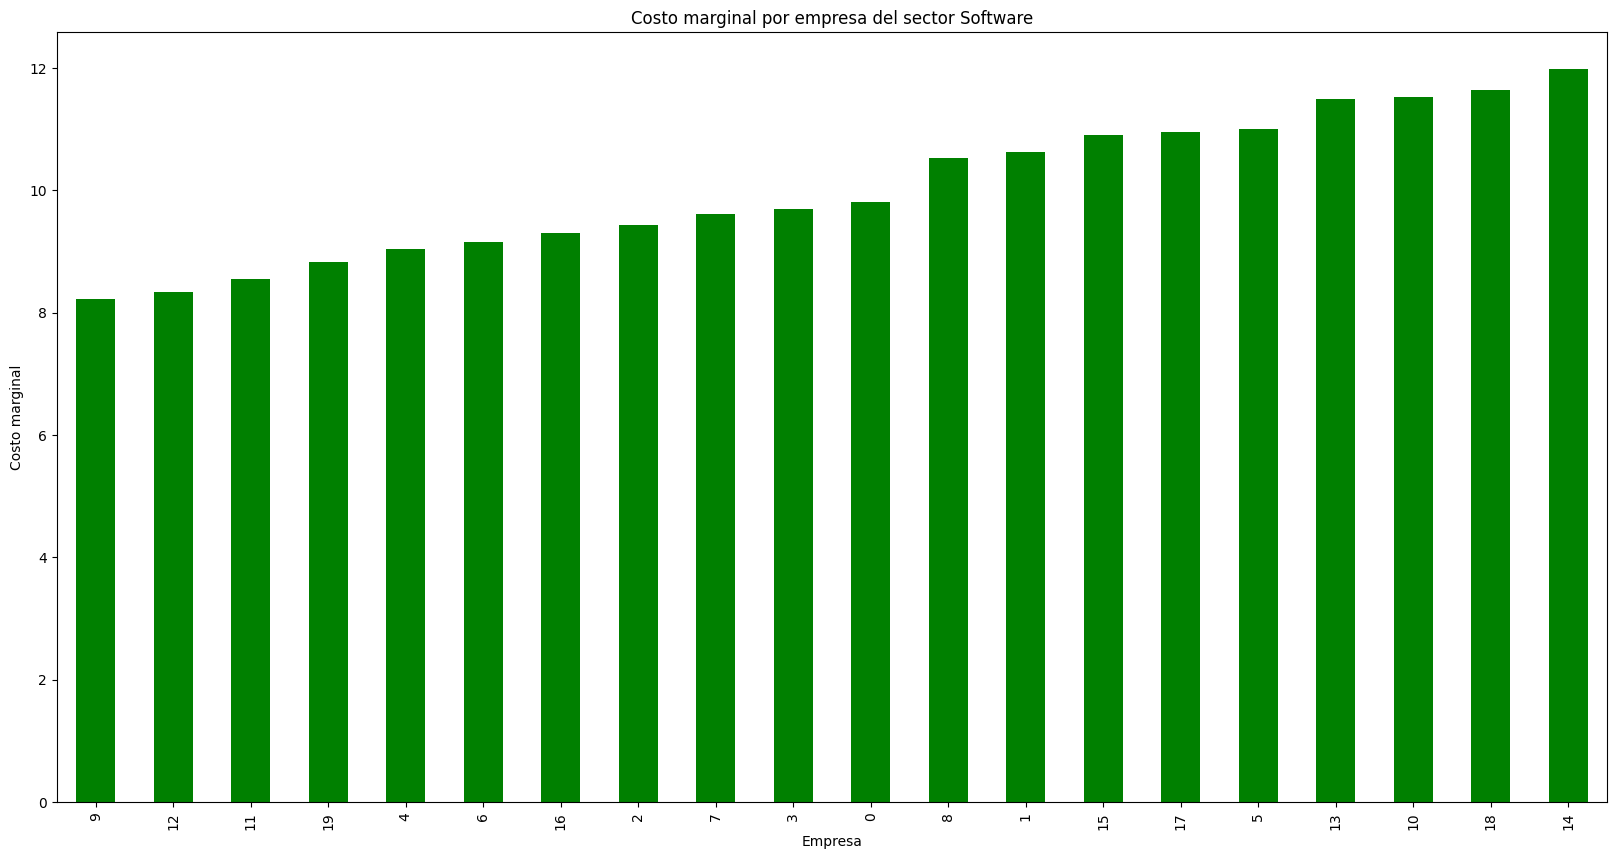

In [ ]:
plot.rcParams["figure.figsize"] = (20,10)
df[df['sector']=='Software']['cm'].sort_values().plot.bar(color='green')
plot.title('Costo marginal por empresa del sector Software')
ax = plot.subplot()
ax.set_xlabel('Empresa')
ax.set_ylabel('Costo marginal')

Text(0, 0.5, 'Costo marginal')

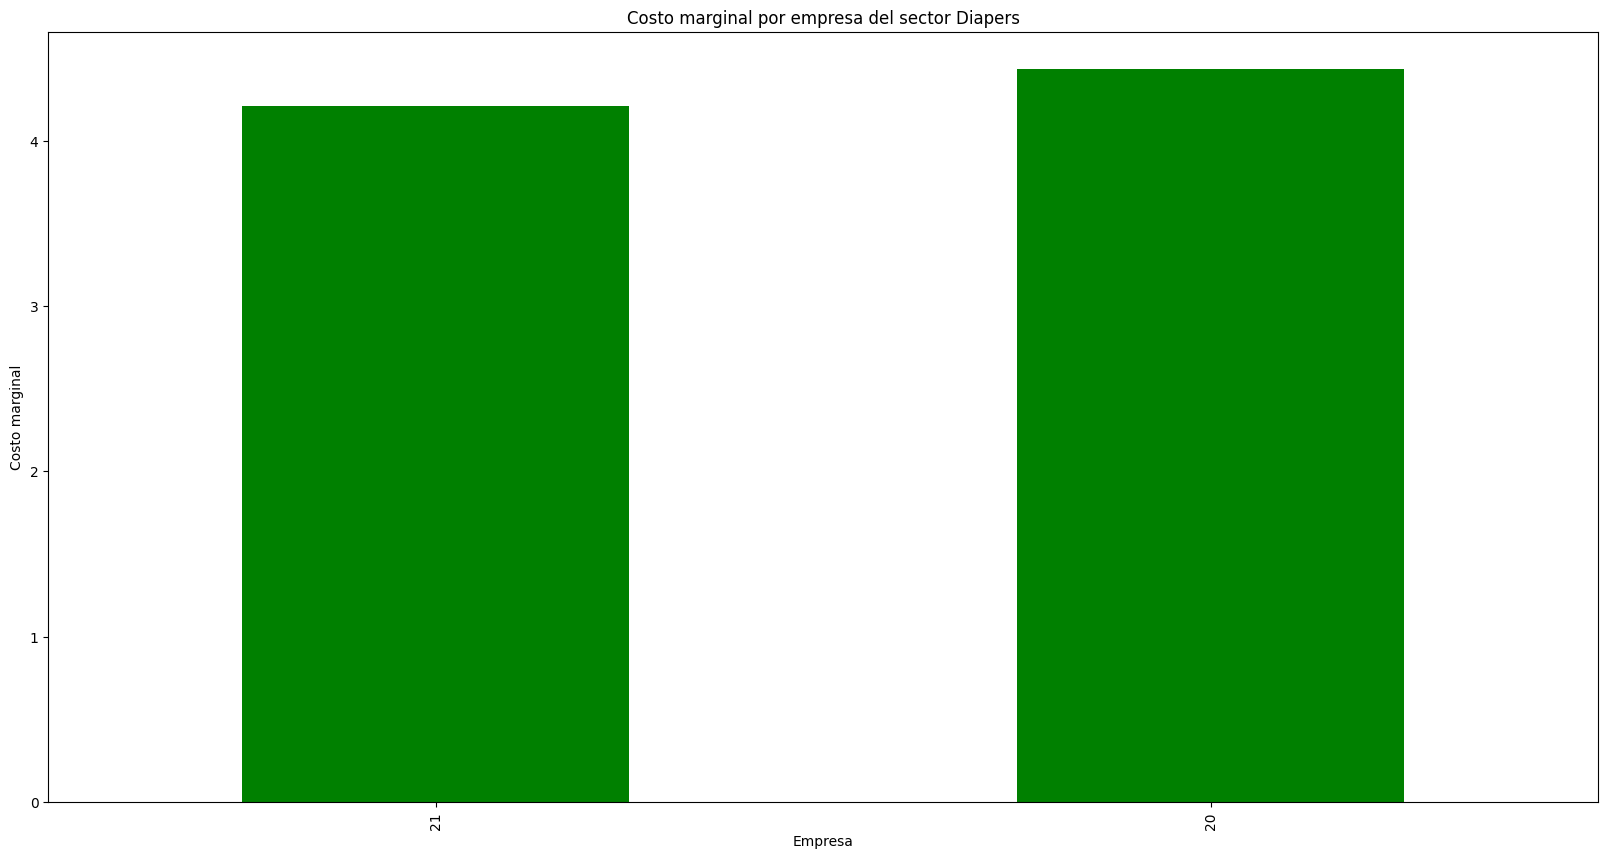

In [ ]:
plot.rcParams["figure.figsize"] = (20,10)
df[df['sector']=='Diapers']['cm'].sort_values().plot.bar(color='green')
plot.title('Costo marginal por empresa del sector Diapers')
ax = plot.subplot()
ax.set_xlabel('Empresa')
ax.set_ylabel('Costo marginal')

Text(0, 0.5, 'Costo marginal')

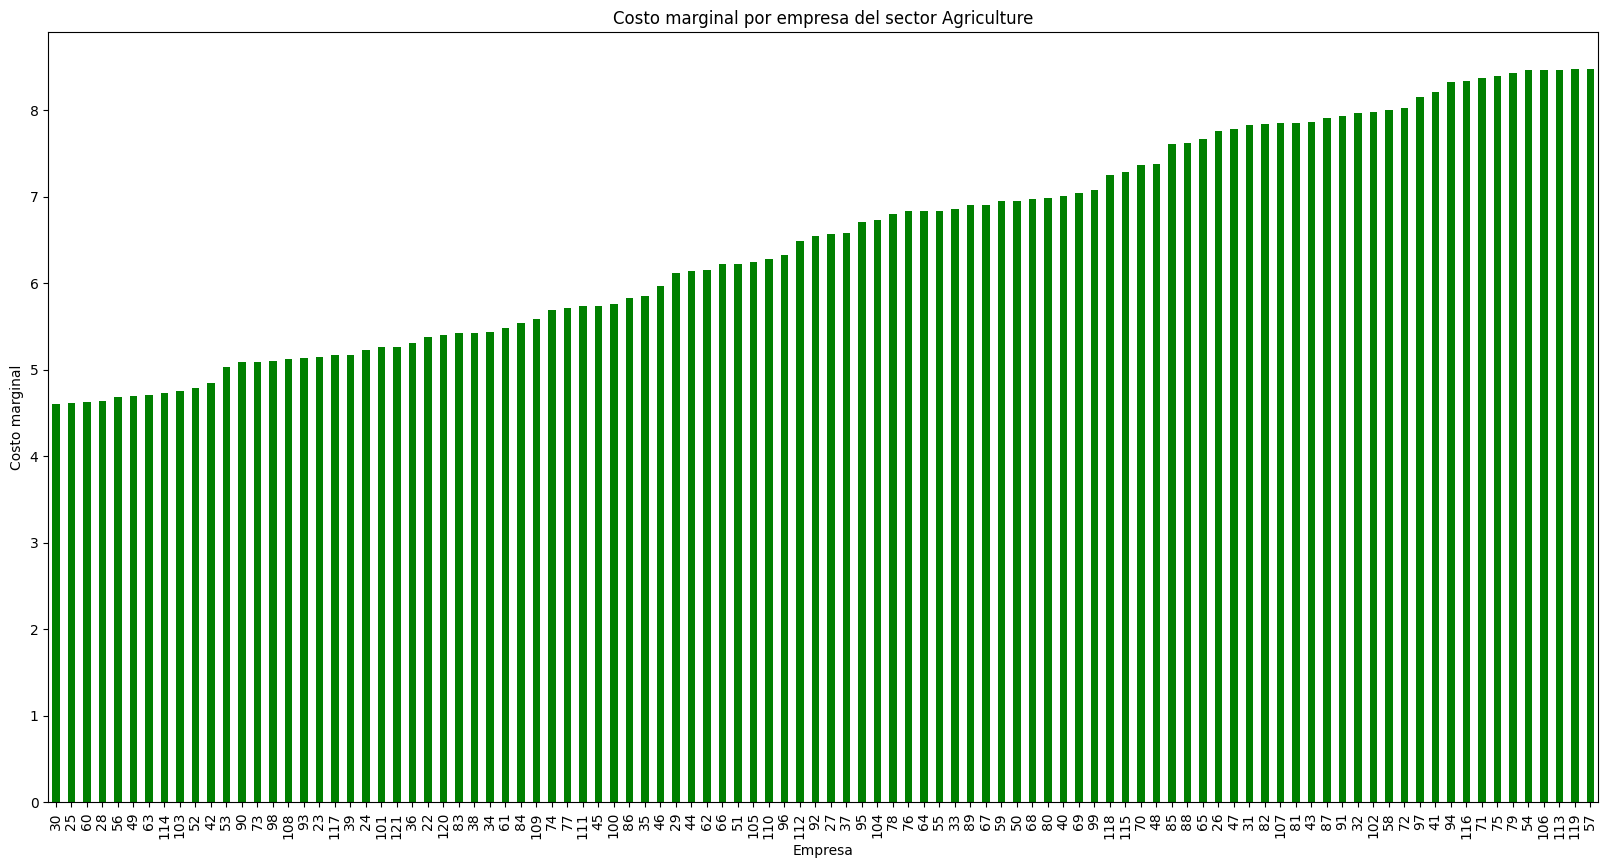

In [ ]:
plot.rcParams["figure.figsize"] = (20,10)
df[df['sector']=='Agriculture']['cm'].sort_values().plot.bar(color='green')
plot.title('Costo marginal por empresa del sector Agriculture')
ax = plot.subplot()
ax.set_xlabel('Empresa')
ax.set_ylabel('Costo marginal')

Text(0, 0.5, 'Costo marginal')

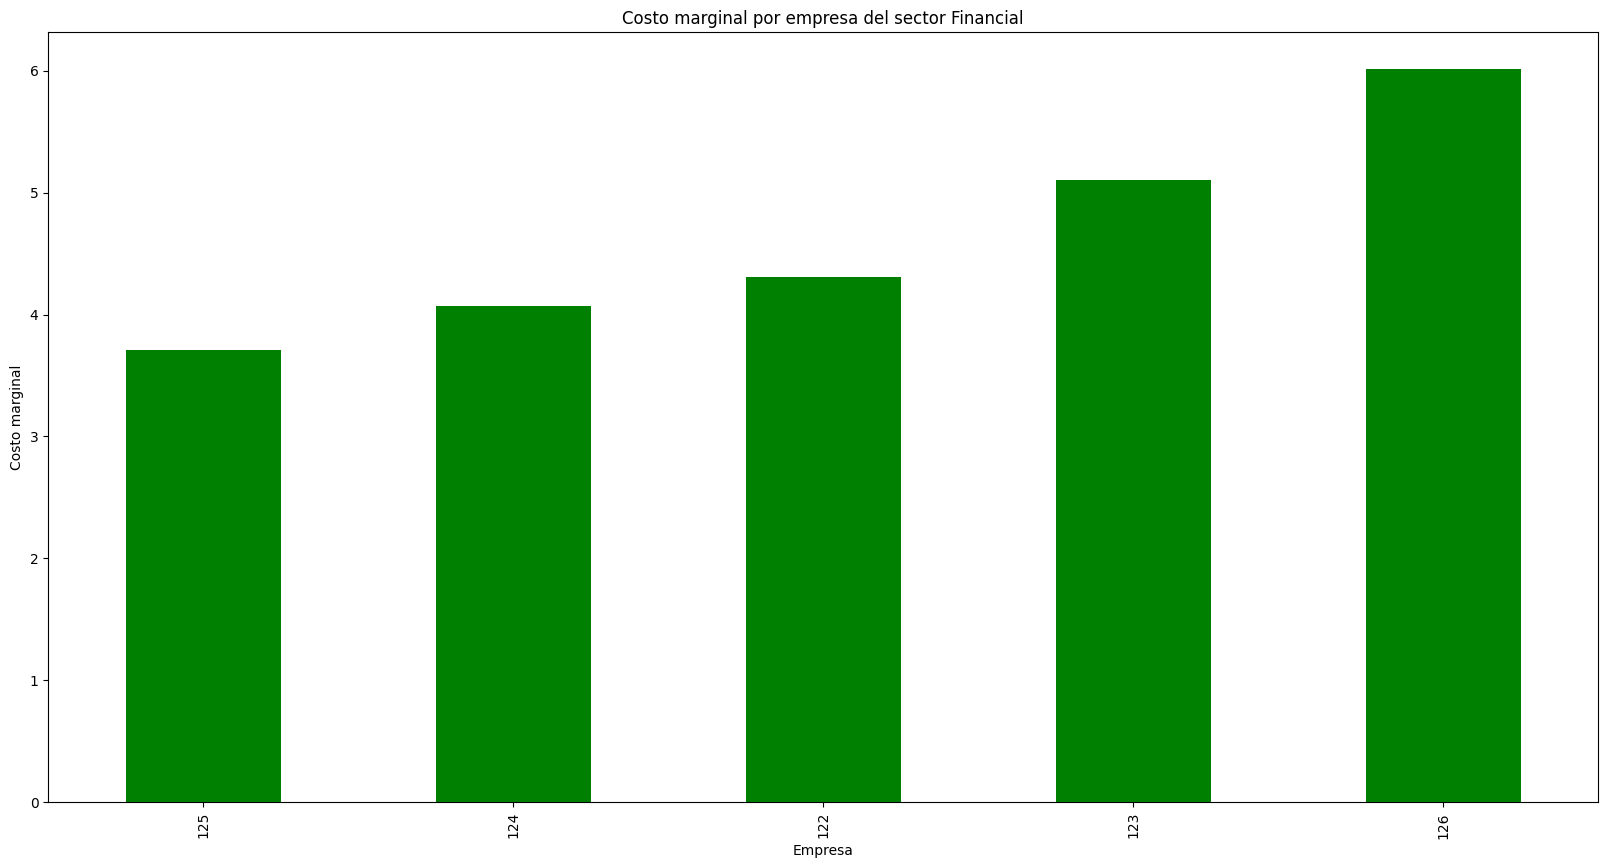

In [ ]:
plot.rcParams["figure.figsize"] = (20,10)
df[df['sector']=='Financial']['cm'].sort_values().plot.bar(color='green')
plot.title('Costo marginal por empresa del sector Financial')
ax = plot.subplot()
ax.set_xlabel('Empresa')
ax.set_ylabel('Costo marginal')

**2.3** Para visualizar las 3 primeras empresas con mayor producción por sector, nos basaremos en las gráficas mostradas anteriormente y las listaremos en las siguientes tablas:

**Sector Software:**

In [ ]:
df_software = df[df['sector']=='Software'].sort_values(by = "q", ascending = False).head(3)
df_software

Unnamed: 0       theta  beta         cm    sector          q  \
13          13  127.017750   2.5  11.482045  Software  23.107141   
9            9  124.790870   3.5   8.217651  Software  16.653317   
7            7  124.099272   3.5   9.616374  Software  16.354700   

    QTotalSector  Participación (%)  
13      113.3359              20.39  
9       113.3359              14.69  
7       113.3359              14.43

Para el sector de Software, que cuenta con un total de 20 empresas, la que tiene mayor producción es la empresa 13, la cual tiene una producción óptima de 23.11, equivalente a una participación del 20.39% de la producción total de todo el sector.

La siguen las empresas 9 y 7, con producciones de 16.65 y 16.35, respectivamente. De igual manera, la empresa 1 tiene una participación de 14.69% y la empresa 4 de 14.43%, con respecto a la producción total del sector.

**Sector Diapers**

In [ ]:
df_diapers = df[df['sector']=='Diapers'].sort_values(by = "q", ascending = False).head(3)
df_diapers

Unnamed: 0        theta  beta        cm   sector           q  \
20           0  9004.596285  10.0  4.436117  Diapers  450.008008   
21           1  9002.209441  29.0  4.209153  Diapers  155.137936   

    QTotalSector  Participación (%)  
20    605.145944              74.36  
21    605.145944              25.64

Para el sector de Diapers, solo se cuentan con 2 empresas registradas en la base de datos. La empresa con mayor producción es la 0, la cual tiene una producción óptima de 450.01, equivalente a una participación del 74.36% de la producción total de todo el sector.

La sigue la empresa 1, con una producción de 155.15. De igual manera, esta empresa tiene una participación del 25.64% con respecto a la producción total del sector.

**Sector Agriculture**

In [ ]:
df_agriculture = df[df['sector']=='Agriculture'].sort_values(by = "q", ascending = False).head(3)
df_agriculture

Unnamed: 0       theta  beta        cm       sector          q  \
110          88  804.735992   5.4  6.279202  Agriculture  73.931184   
25            3  802.640364   5.4  4.619689  Agriculture  73.890803   
114          92  802.354577   5.4  4.732733  Agriculture  73.853874   

     QTotalSector  Participación (%)  
110   2845.023085                2.6  
25    2845.023085                2.6  
114   2845.023085                2.6

Para el sector de Agriculture, que cuenta con un registro de 100 empresas, la empresa con mayor producción es la 88, la cual tiene una producción óptima de 73.93, equivalente a una participación del 2.6% de la producción total de todo el sector.

La siguen las empresas 3 y 92, con producciones de 73.89 y 73.85, respectivamente. De igual manera, la empresa 3 tiene una participación de 2.6% y la empresa 92 de 2.6%, con respecto a la producción total del sector.

**Sector Financial**

In [ ]:
df_financial = df[df['sector']=='Financial'].sort_values(by = "q", ascending = False).head(3)
df_financial

Unnamed: 0        theta  beta        cm     sector          q  \
123           1  1236.938396  11.4  5.101223  Financial  54.027946   
124           2  1235.802773  12.4  4.073056  Financial  49.666521   
125           3  1237.271186  23.4  3.709515  Financial  26.358155   

     QTotalSector  Participación (%)  
123    175.602295              30.77  
124    175.602295              28.28  
125    175.602295              15.01

Del sector Financial, con un total de 5 empresas registradas, la que tiene una mayor producción óptima es la empresa 1, la cual cuenta con 54.03 unidades producidas y una participación de 30.77% con respecto al total de la producción del sector.

A esta, le siguen las empresas 2 y 3, con producciones de 49.67 y 26.36, respectivamente. De igual manera, la empresa 2 tiene una participación de 28.28% y la empresa 3 de 15.01%, con respecto a la producción total del sector.


**2.4** Para mostrar las 3 primeras empresas con menores costos marginales, utilizaremos las gráficas mostradas en el punto 2.2 y las listaremos en las siguientes tablas:

**Sector Software**

In [ ]:
df_softwarecm = df[df['sector']=='Software'].sort_values(by = "cm",ascending = True).head(3)
df_softwarecm

Unnamed: 0       theta  beta        cm    sector          q  QTotalSector  \
9            9  124.790870   3.5  8.217651  Software  16.653317      113.3359   
12          12  127.385524   8.5  8.336039  Software   7.002911      113.3359   
11          11  125.811243  24.5  8.553535  Software   2.393014      113.3359   

    Participación (%)  
9               14.69  
12               6.18  
11               2.11

Se observa que la empresa del sector Software, con menor costo marginal, es la 9, con un costo de 8.22 y con una alta participación en el mercado, con una producción óptima de 16.65.

A esta empresa, le siguen las empresas 12 y 11, que tienen costos de 8.34 y 8.55, respectivamente. Además cuentan con producciones mucho más bajas que la empresa 9, con 7.00 para la 12 y 2.39 para la 11.

**Sector Diapers**

In [ ]:
df_diaperscm = df[df['sector']=='Diapers'].sort_values(by = "cm",ascending = True).head(3)
df_diaperscm

Unnamed: 0        theta  beta        cm   sector           q  \
21           1  9002.209441  29.0  4.209153  Diapers  155.137936   
20           0  9004.596285  10.0  4.436117  Diapers  450.008008   

    QTotalSector  Participación (%)  
21    605.145944              25.64  
20    605.145944              74.36

De las dos empresas del sector Diapers, la que menor costo marginal tiene, es la empresa 1, con 4.21 y la menor producción óptima con 155.14.

A esta empresa, la sigue la empresa 0 con un costo de 4.44 y la mayor producción óptima de 450.01.

**Sector Agriculture**

In [ ]:
df_agriculturecm = df[df['sector']=='Agriculture'].sort_values(by = "cm",ascending = True).head(3)
df_agriculturecm

Unnamed: 0       theta  beta        cm       sector          q  \
30           8  801.828630  14.4  4.600602  Agriculture  27.681529   
25           3  802.640364   5.4  4.619689  Agriculture  73.890803   
60          38  802.644327  10.4  4.627975  Agriculture  38.366171   

    QTotalSector  Participación (%)  
30   2845.023085               0.97  
25   2845.023085               2.60  
60   2845.023085               1.35

En el sector de agriculture, las empresas con menores costos son la 8, la 3 y la 38, con costos de 4.60, 4.62 y 4.63, respectivamente. La diferencia entre una y otra no es alta, sin embargo, en lo que si difieren es en las cantidades producidas, en donde la empresa 3 produce aproximadamente el doble de la empresa 38 y casi el triple de lo que produce la empresa 8.

**Sector Financial**

In [ ]:
df_financialcm = df[df['sector']=='Financial'].sort_values(by = "cm",ascending = True).head(3)
df_financialcm

Unnamed: 0        theta  beta        cm     sector          q  \
125           3  1237.271186  23.4  3.709515  Financial  26.358155   
124           2  1235.802773  12.4  4.073056  Financial  49.666521   
122           0  1237.516764  24.4  4.306088  Financial  25.270711   

     QTotalSector  Participación (%)  
125    175.602295              15.01  
124    175.602295              28.28  
122    175.602295              14.39

Se observa que la empresa del sector Financial, con menor costo marginal, es la 3, con un costo de 3.71 y una produccion de 26.36.

A esta empresa, le siguen la empresa 2, que tiene costos de 4.07 y una producción que es aproximadamente el doble en comparación con la de la empresa 3; y la empresa 0, con costos de 4.31 y una producción similar a la de la empresa 3, pero reducida, casi a la mitad, de lo que produce la empresa 2.

**2.5** Para determinar los precios a los que se venden dichos productos, para cada empresa, tenemos que:

$$ P = θ - βq $$

De este modo, calculamos los precios y los incluimos dentro de la tabla:


In [ ]:
df['Precio (P)']=(df['theta'])-(df['beta']*df['q'])
df

Unnamed: 0        theta  beta         cm     sector          q  \
0             0   125.121419  31.5   9.799712   Software   1.830503   
1             1   125.645324  30.5  10.616998   Software   1.885710   
2             2   126.766324  17.5   9.426922   Software   3.352554   
3             3   127.141536  22.5   9.698818   Software   2.609838   
4             4   127.472341  28.5   9.042124   Software   2.077723   
..          ...          ...   ...        ...        ...        ...   
122           0  1237.516764  24.4   4.306088  Financial  25.270711   
123           1  1236.938396  11.4   5.101223  Financial  54.027946   
124           2  1235.802773  12.4   4.073056  Financial  49.666521   
125           3  1237.271186  23.4   3.709515  Financial  26.358155   
126           4  1238.975302  30.4   6.014435  Financial  20.278962   

     QTotalSector  Participación (%)  Precio (P)  
0      113.335900               1.62   67.460566  
1      113.335900               1.66   68.131161  
2      113.335900               2.96   68.096623  
3      113.335900               2.30   68.420177  
4      113.335900               1.83   68.257232  
..            ...                ...         ...  
122    175.602295              14.39  620.911426  
123    175.602295              30.77  621.019809  
124    175.602295              28.28  619.937914  
125    175.602295              15.01  620.490351  
126    175.602295              11.55  622.494869  

[127 rows x 9 columns]

Con los precios calculados, se analizaron, para cada sector, las siguientes medidas de tendencia central y de dispersión:

In [ ]:
for sector in sectores:
  mean =  df[df['sector']==sector]['Precio (P)'].mean()
  max = df[df['sector']==sector]['Precio (P)'].max()
  min = df[df['sector']==sector]['Precio (P)'].min()
  std =  df[df['sector']==sector]['Precio (P)'].std()
  median = df[df['sector']==sector]['Precio (P)'].median()
  print(sector, 'mean:', round(mean,2), 'median:', round(median,2), 'max:', round(max,2), 'min:', round(min,2), 'std:',round(std,2) , 'CV:', round(std/mean,4))

Software mean: 67.94 median: 68.07 max: 69.26 min: 66.5 std: 0.76 CV: 0.0112
Diapers mean: 4503.86 median: 4503.86 max: 4504.52 min: 4503.21 std: 0.92 CV: 0.0002
Agriculture mean: 404.65 median: 404.61 max: 406.64 min: 402.91 std: 0.84 CV: 0.0021
Financial mean: 620.97 median: 620.91 max: 622.49 min: 619.94 std: 0.95 CV: 0.0015


De acuerdo con los resultados obtenidos, para los precios por sector, se observa que todos los coeficientes de variación, son menores a 0.3, e incluso muy cercanos a 0, por lo que los conjuntos de datos, son homogéneos, no existe mucha variabilidad entre datos y la media es representativa, siendo muy similar a la mediana.

Con esto se puede decir que:


*   Para el sector de Software, el precio promedio de las empresas es 67.94.
*   Para el sector de Diapers, el precio promedio de las empresas es 4503.86.
*   Para el sector de Agriculture, el precio promedio de las empresas es 404.65.
*   Para el sector de Financial, el precio promedio de las empresas es 620.97.


De igual manera, se graficaron los datos, con el fin de obtener otra visual de la información.

Text(0, 0.5, 'Precio')

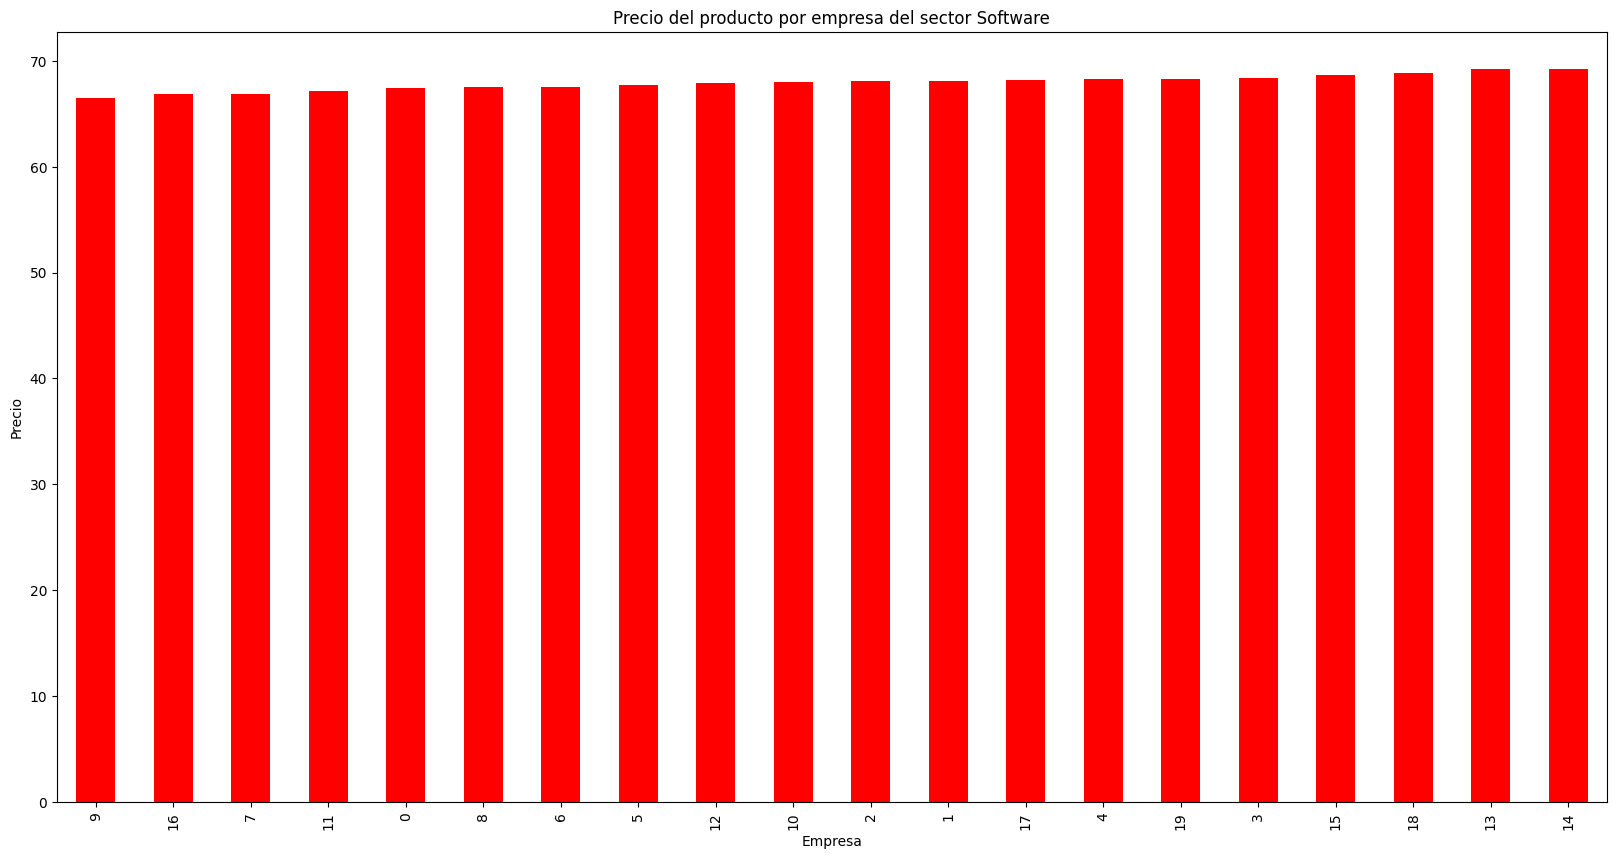

In [ ]:
plot.rcParams["figure.figsize"] = (20,10)
df[df['sector']=='Software']['Precio (P)'].sort_values().plot.bar(color='red')
plot.title('Precio del producto por empresa del sector Software')
ax = plot.subplot()
ax.set_xlabel('Empresa')
ax.set_ylabel('Precio')

Text(0, 0.5, 'Precio')

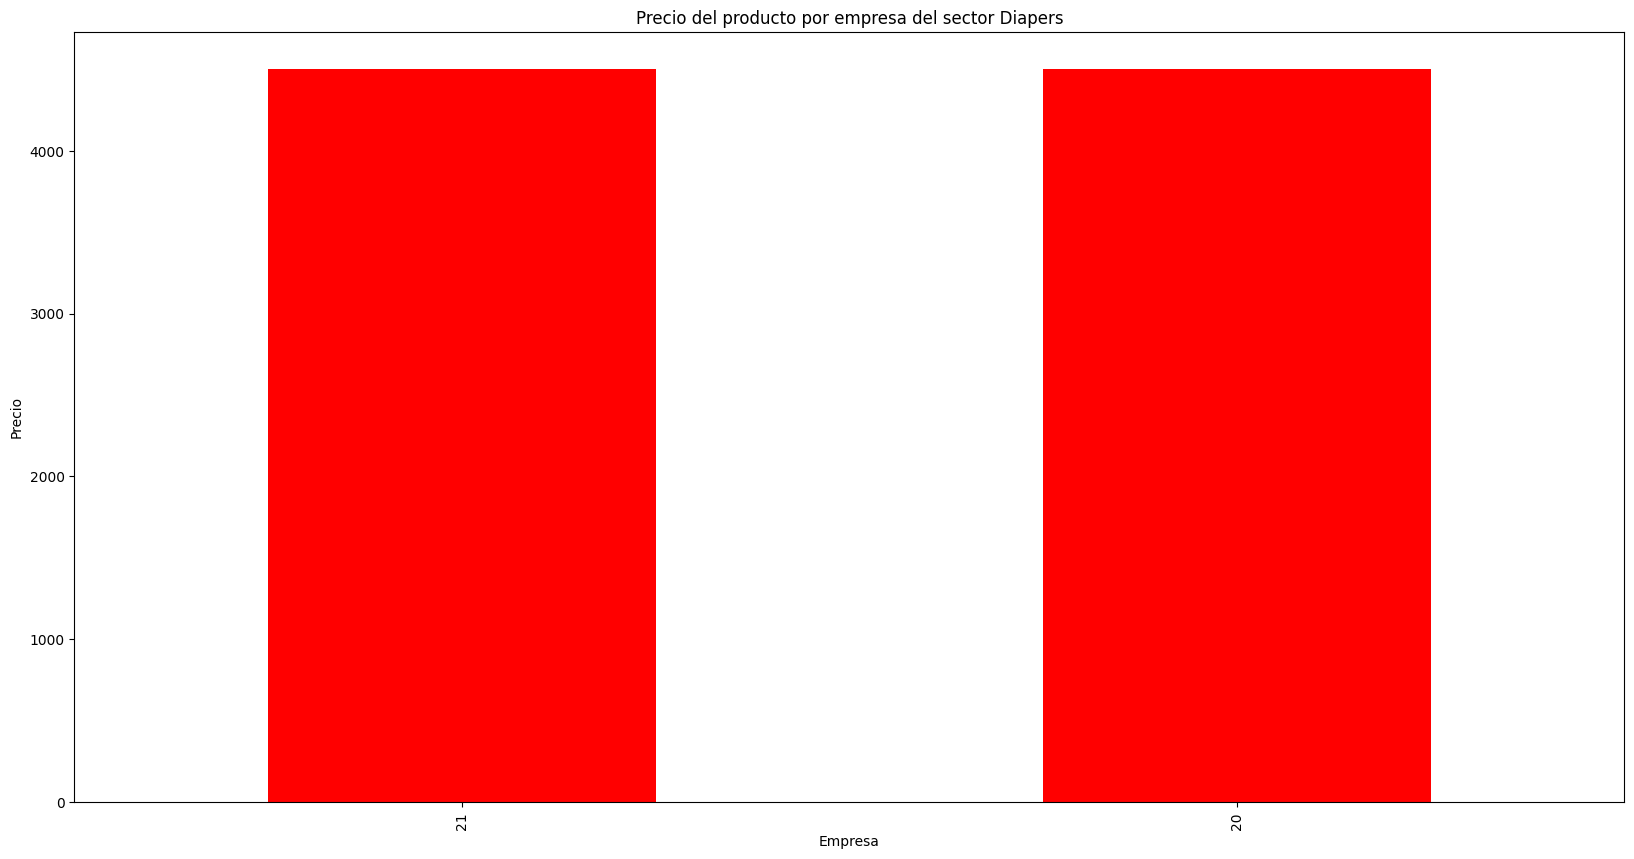

In [ ]:
plot.rcParams["figure.figsize"] = (20,10)
df[df['sector']=='Diapers']['Precio (P)'].sort_values().plot.bar(color='red')
plot.title('Precio del producto por empresa del sector Diapers')
ax = plot.subplot()
ax.set_xlabel('Empresa')
ax.set_ylabel('Precio')

Text(0, 0.5, 'Precio')

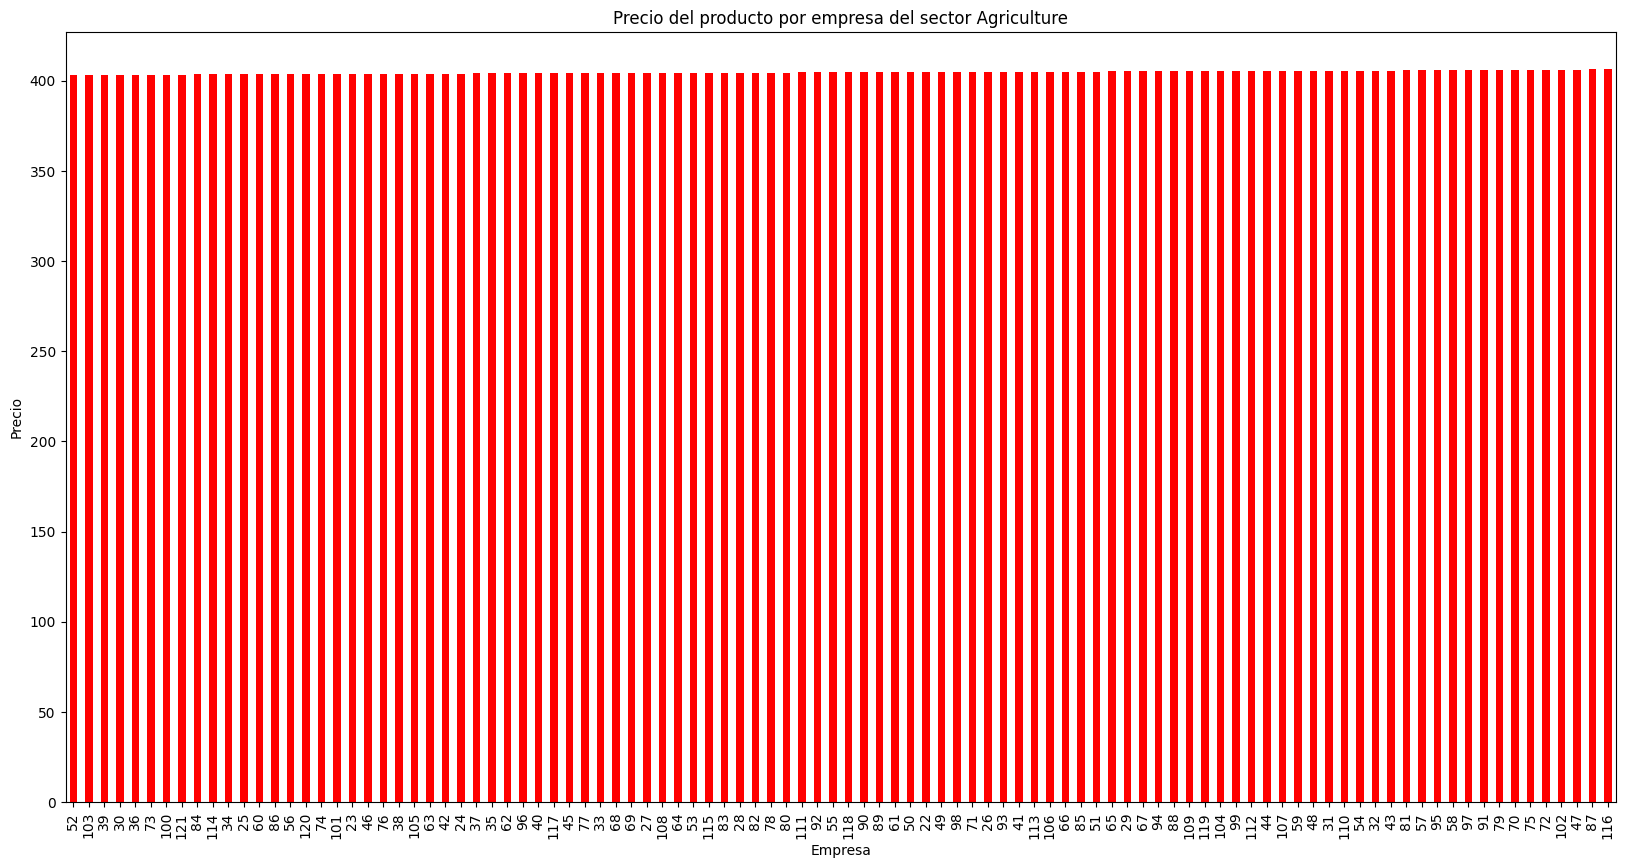

In [ ]:
plot.rcParams["figure.figsize"] = (20,10)
df[df['sector']=='Agriculture']['Precio (P)'].sort_values().plot.bar(color='red')
plot.title('Precio del producto por empresa del sector Agriculture')
ax = plot.subplot()
ax.set_xlabel('Empresa')
ax.set_ylabel('Precio')

Text(0, 0.5, 'Precio')

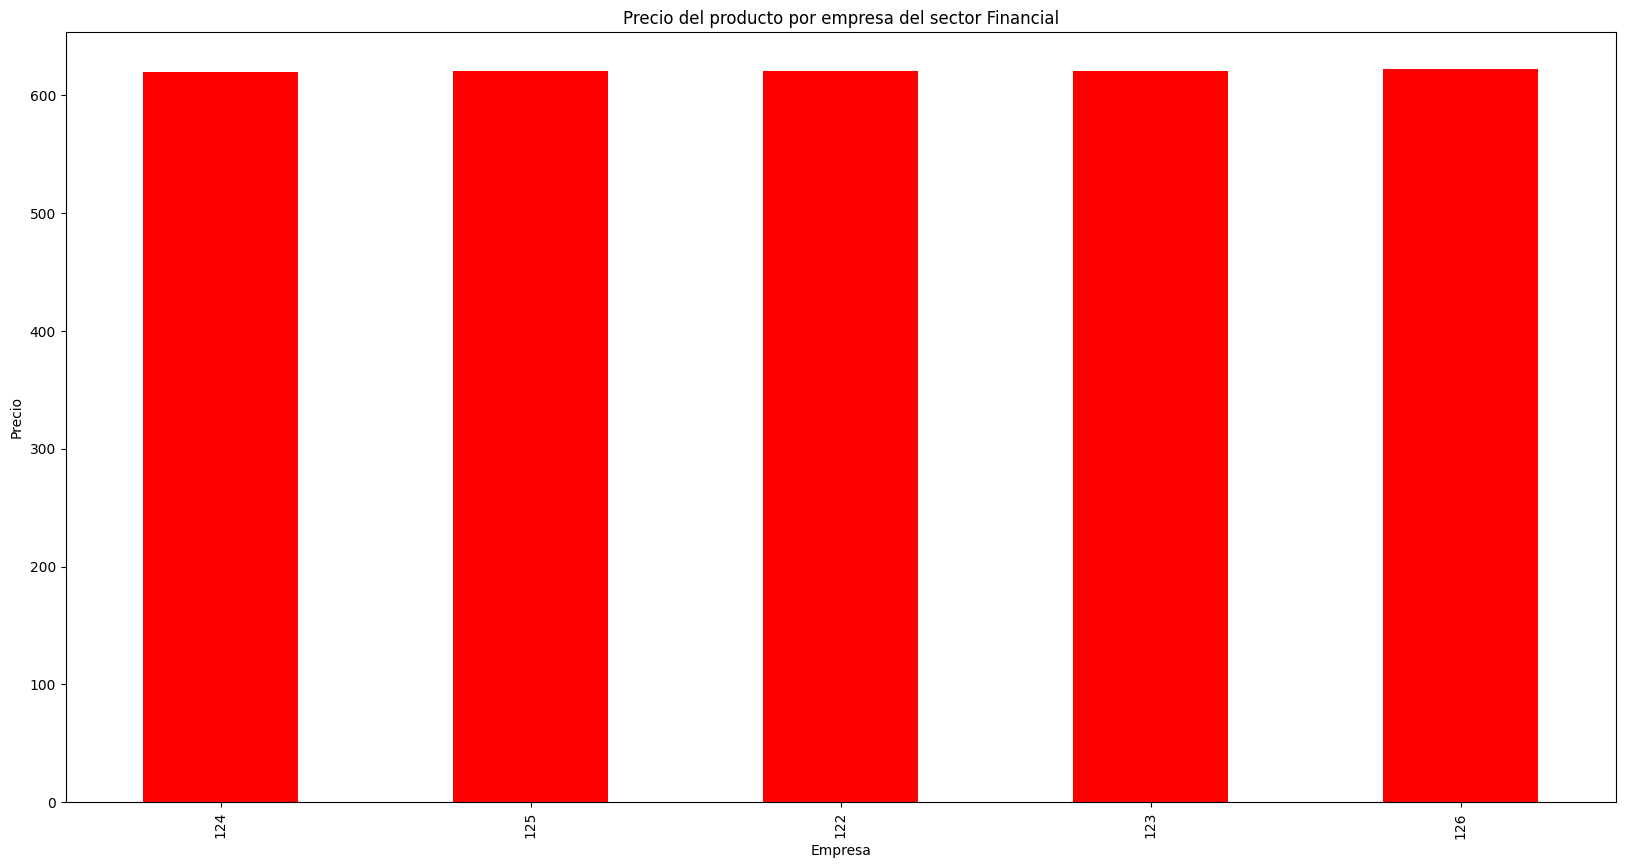

In [ ]:
plot.rcParams["figure.figsize"] = (20,10)
df[df['sector']=='Financial']['Precio (P)'].sort_values().plot.bar(color='red')
plot.title('Precio del producto por empresa del sector Financial')
ax = plot.subplot()
ax.set_xlabel('Empresa')
ax.set_ylabel('Precio')